# Ratio Approach (Load Factor)

In [1]:
import os
os.chdir("../../")

import numpy as np
import pandas as pd

from src.tourism.mtsmodel import *
from src.tourism.ts_eval import *

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

import sys
import arviz as az
try:
    import bambi as bmb
except ImportError:
    !{sys.executable} -m pip install --upgrade bambi
    import bambi as bmb
    
import warnings
warnings.filterwarnings("ignore")

[2023-12-16 15:57:15 - pytensor.tensor.blas:1016 - WARNING] Using NumPy C-API based implementation for BLAS functions.


In [2]:
def plot_observed(data, figsize=(12, 8)):
    _, ax = plt.subplots(figsize=figsize)
    ax.plot(data["date"], data["total"], alpha=0.4, color="blue")
    ax.plot(data["date"], data["pred_mean"], alpha=0.4, color="green")
    ax.set_title("Number of Tourists")
    ax.set_xlabel("Date")
    ax.set_ylabel("Number")
    return ax

In [3]:
for country in ["samoa", "palau", "tonga", "solomon_islands", "vanuatu"]:

    mod = RatioPipe(country=country,
                    training_ratio=0.95,
                    y_var="total",
                    exog_var=["covid", "stringency_index", "samoa_travel"],
                    transform_method="scaledlogit")
    mod.read_and_merge()
    mod.transform()
    mod.fit(formula="ratio~covid * stringency_index+C(quarter)+" +
            str(country) + "_travel")
    pred_df = mod.get_prediction()
    mod.get_benchmark_evaluation()
    display(mod.benchmark)
    

,MSE,RMSE,MAE,SMAPE
naive,7.970104e+06,2823.137282,1518.795455,49.120902
mean,4.747392e+07,6890.131975,6027.062716,155.537953
seasonal naive,1.277842e+08,11304.165437,8357.200000,184.252367
ratio,2.071537e+06,1439.283344,736.658009,131.050625


,MSE,RMSE,MAE,SMAPE
naive,1.298621e+06,1139.570483,677.477273,53.868245
mean,1.219030e+07,3491.460526,3125.890370,130.888109
seasonal naive,3.259447e+07,5709.156811,4496.422222,172.783359
ratio,5.361937e+05,732.252502,398.865184,38.850790


,MSE,RMSE,MAE,SMAPE
naive,1.045461e+06,1022.477747,597.257143,69.556373
mean,7.898678e+06,2810.458659,2511.586420,147.552078
seasonal naive,2.298302e+07,4794.060863,3770.944444,175.765515
ratio,2.180673e+05,466.976806,264.960357,91.467507


,MSE,RMSE,MAE,SMAPE
naive,1.721267e+05,414.881597,268.478261,46.835106
mean,1.290167e+06,1135.855000,1065.215278,100.969388
seasonal naive,5.452023e+06,2334.956763,2232.833333,178.391803
ratio,4.762116e+04,218.222737,143.623769,21.253277


,MSE,RMSE,MAE,SMAPE
naive,2.446383e+06,1564.091833,808.452381,45.153360
mean,2.273834e+07,4768.473803,4264.861006,156.566459
seasonal naive,6.005609e+07,7749.586508,5836.813953,182.249894
ratio,5.944251e+05,770.989718,471.720655,127.418109



SAMOA's Official and Avaition Data.

 Create Loaded Factor for SAMOA:

 Regression SAMOA:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     50.85
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           4.55e-17
Time:                        16:30:44   Log-Likelihood:                 30.672
No. Observations:                  45   AIC:                            -45.34
Df Residuals:                      37   BIC:                            -30.89
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.522368,13755.0,26332.0,0.621337,0.065119,0.493705,0.748968,0.327609,0.915064,16361.033442
1,2019-02-01,0.522171,9044.0,17320.0,0.546506,0.052126,0.444341,0.648670,0.262915,0.830096,9465.476885
2,2019-03-01,0.535575,11163.0,20843.0,0.527865,0.060020,0.410228,0.645502,0.238340,0.817390,11002.290740
3,2019-04-01,0.692899,14413.0,20801.0,0.573619,0.095068,0.387289,0.759948,0.250038,0.897200,11931.843012
4,2019-05-01,0.650818,13565.0,20843.0,0.661691,0.048354,0.566918,0.756464,0.380679,0.942704,13791.631497


,MSE,RMSE,MAE,SMAPE
mean,4.747392e+07,6890.131975,6027.062716,155.537953
naive,7.970104e+06,2823.137282,1518.795455,49.120902
ratio,2.107651e+06,1451.775046,763.990597,131.108537


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ratio_sigma, Intercept, covid, stringency_index, covid:stringency_index, C(quarter), samoa_travel]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.347,0.136,0.086,0.599,0.002,0.001,4829.636,5526.037,1.001
covid,-0.303,0.119,-0.527,-0.078,0.002,0.001,5088.282,4956.939,1.000
stringency_index,-0.010,0.004,-0.018,-0.001,0.000,0.000,3307.540,4263.178,1.001
covid:stringency_index,0.004,0.006,-0.007,0.015,0.000,0.000,3076.624,3998.751,1.001
C(quarter)[2],0.042,0.064,-0.077,0.165,0.001,0.001,3984.563,5088.280,1.002
C(quarter)[3],0.140,0.065,0.017,0.261,0.001,0.001,4145.464,5373.759,1.001
C(quarter)[4],0.052,0.064,-0.070,0.169,0.001,0.001,4761.951,5324.729,1.001
samoa_travel,0.279,0.154,-0.003,0.576,0.002,0.002,3829.551,5045.903,1.001
ratio_sigma,0.139,0.017,0.109,0.170,0.000,0.000,4232.992,4479.461,1.000



PALAU's Official and Avaition Data.

 Create Loaded Factor for PALAU:

 Regression PALAU:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     13.44
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.75e-08
Time:                        16:31:00   Log-Likelihood:                 33.066
No. Observations:                  45   AIC:                            -50.13
Df Residuals:                      37   BIC:                            -35.68
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.561695,7329.0,13048.0,0.568892,0.063856,0.443738,0.694047,0.288562,0.849223,7422.908852
1,2019-02-01,0.734282,9752.0,13281.0,0.618457,0.056377,0.507960,0.728954,0.344356,0.892558,8213.728390
2,2019-03-01,0.701865,9033.0,12870.0,0.620869,0.056211,0.510697,0.731041,0.346899,0.894839,7990.583924
3,2019-04-01,0.777809,8405.0,10806.0,0.590318,0.070420,0.452297,0.728340,0.304011,0.876625,6378.979940
4,2019-05-01,0.651848,7478.0,11472.0,0.494435,0.098075,0.302212,0.686658,0.178411,0.810459,5672.158297


,MSE,RMSE,MAE,SMAPE
mean,1.219030e+07,3491.460526,3125.890370,130.888109
naive,1.298621e+06,1139.570483,677.477273,53.868245
ratio,5.220592e+05,722.536632,403.159217,41.454946


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ratio_sigma, Intercept, covid, stringency_index, covid:stringency_index, C(quarter), palau_travel]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.458,0.079,0.314,0.612,0.001,0.001,6329.552,5813.643,1.000
covid,-0.488,0.111,-0.701,-0.284,0.001,0.001,5902.204,5141.634,1.000
stringency_index,-0.009,0.003,-0.014,-0.002,0.000,0.000,4221.898,5373.154,1.000
covid:stringency_index,0.010,0.004,0.003,0.017,0.000,0.000,3604.963,4509.327,1.000
C(quarter)[2],-0.059,0.057,-0.166,0.049,0.001,0.001,4638.155,5017.895,1.001
C(quarter)[3],0.042,0.059,-0.074,0.149,0.001,0.001,4821.238,5518.567,1.000
C(quarter)[4],0.013,0.062,-0.102,0.129,0.001,0.001,4747.722,5060.986,1.000
palau_travel,0.559,0.190,0.220,0.937,0.002,0.002,6787.743,5645.252,1.000
ratio_sigma,0.132,0.016,0.103,0.160,0.000,0.000,5368.188,5631.830,1.000



TONGA's Official and Avaition Data.

 Create Loaded Factor for TONGA:

 Regression TONGA:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     81.33
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.54e-17
Time:                        16:31:14   Log-Likelihood:                 60.571
No. Observations:                  36   AIC:                            -105.1
Df Residuals:                      28   BIC:                            -92.47
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.297294,4372,14706.0,0.359100,0.053865,0.253527,0.464674,0.213704,0.504496,5280.927090
1,2019-02-01,0.278131,2709,9740.0,0.360868,0.051441,0.260045,0.461691,0.218884,0.502852,3514.852693
2,2019-03-01,0.303732,3109,10236.0,0.363279,0.048249,0.268712,0.457845,0.225667,0.500890,3718.522264
3,2019-04-01,0.394065,4183,10615.0,0.439962,0.028537,0.384030,0.495894,0.325408,0.554515,4670.193497
4,2019-05-01,0.435655,5166,11858.0,0.447279,0.026097,0.396130,0.498428,0.334983,0.559575,5303.835766


,MSE,RMSE,MAE,SMAPE
mean,7.898678e+06,2810.458659,2511.586420,147.552078
naive,1.045461e+06,1022.477747,597.257143,69.556373
ratio,2.036229e+05,451.245944,258.523902,87.345914


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ratio_sigma, Intercept, covid, stringency_index, covid:stringency_index, C(quarter), tonga_travel]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 10 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.346,0.040,0.272,0.421,0.001,0.000,5263.232,5249.449,1.001
covid,-0.350,0.065,-0.467,-0.226,0.001,0.001,3943.427,4480.263,1.001
stringency_index,-0.005,0.001,-0.007,-0.002,0.000,0.000,3216.648,4314.146,1.000
covid:stringency_index,0.003,0.002,-0.001,0.007,0.000,0.000,2433.619,3743.127,1.000
C(quarter)[2],0.085,0.030,0.029,0.141,0.001,0.000,3441.445,4789.343,1.000
C(quarter)[3],0.113,0.029,0.058,0.167,0.000,0.000,3637.176,4798.696,1.000
C(quarter)[4],0.075,0.028,0.020,0.125,0.000,0.000,3669.125,5129.919,1.000
tonga_travel,0.065,0.109,-0.138,0.277,0.001,0.001,6903.663,5258.066,1.001
ratio_sigma,0.054,0.008,0.041,0.068,0.000,0.000,4590.989,4917.614,1.001



SOLOMON_ISLANDS's Official and Avaition Data.

 Create Loaded Factor for SOLOMON_ISLANDS:

 Regression SOLOMON_ISLANDS:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     239.4
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           5.56e-15
Time:                        16:31:29   Log-Likelihood:                 54.264
No. Observations:                  24   AIC:                            -92.53
Df Residuals:                      16   BIC:                            -83.10
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.174372,1750,10036.0,0.212880,0.017130,0.179306,0.246454,0.143644,0.282117,2136.464988
1,2019-02-01,0.199662,1891,9471.0,0.208311,0.014280,0.180324,0.236299,0.141605,0.275018,1972.917412
2,2019-03-01,0.245332,2378,9693.0,0.201838,0.018773,0.165043,0.238632,0.130984,0.272691,1956.411325
3,2019-04-01,0.220940,2106,9532.0,0.242741,0.008395,0.226287,0.259196,0.179994,0.305489,2313.809745
4,2019-05-01,0.246881,2434,9859.0,0.252211,0.016863,0.219161,0.285261,0.183227,0.321195,2486.545575


,MSE,RMSE,MAE,SMAPE
mean,1.290167e+06,1135.855000,1065.215278,100.969388
naive,1.721267e+05,414.881597,268.478261,46.835106
ratio,4.875343e+04,220.801780,150.232442,26.614403


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ratio_sigma, Intercept, covid, stringency_index, covid:stringency_index, C(quarter), solomon_islands_travel]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.195,0.030,0.138,0.252,0.000,0.000,3886.811,4420.692,1.000
covid,-0.210,0.063,-0.328,-0.092,0.001,0.001,4461.749,4315.389,1.001
stringency_index,-0.002,0.001,-0.004,-0.000,0.000,0.000,3717.781,4216.426,1.001
covid:stringency_index,0.002,0.002,-0.001,0.005,0.000,0.000,3495.810,3955.784,1.001
C(quarter)[2],0.044,0.026,-0.004,0.095,0.000,0.000,3837.976,4527.128,1.000
C(quarter)[3],0.068,0.024,0.022,0.112,0.000,0.000,3661.785,4333.993,1.001
C(quarter)[4],0.049,0.025,0.002,0.095,0.000,0.000,3638.269,4289.997,1.000
solomon_islands_travel,0.066,0.128,-0.181,0.305,0.002,0.001,4470.550,5018.329,1.000
ratio_sigma,0.033,0.007,0.023,0.045,0.000,0.000,2541.840,1907.280,1.001



VANUATU's Official and Avaition Data.

 Create Loaded Factor for VANUATU:

 Regression VANUATU:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     61.08
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           9.75e-18
Time:                        16:31:45   Log-Likelihood:                 55.431
No. Observations:                  43   AIC:                            -94.86
Df Residuals:                      35   BIC:                            -80.77
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.514218,9548.0,18568.0,0.587535,0.066177,0.457829,0.717240,0.393113,0.781956,10909.344103
1,2019-02-01,0.426535,5835.0,13680.0,0.571710,0.068540,0.437375,0.706046,0.374170,0.769250,7820.994292
2,2019-03-01,0.475565,7026.0,14774.0,0.598634,0.064663,0.471896,0.725372,0.406180,0.791088,8844.219480
3,2019-04-01,0.553277,9445.0,17071.0,0.639558,0.046125,0.549155,0.729961,0.468827,0.810288,10917.890355
4,2019-05-01,0.498628,8359.0,16764.0,0.611411,0.048101,0.517135,0.705687,0.438599,0.784223,10249.693376


,MSE,RMSE,MAE,SMAPE
mean,2.273834e+07,4768.473803,4264.861006,156.566459
naive,2.446383e+06,1564.091833,808.452381,45.153360
ratio,6.421134e+05,801.319782,497.354972,128.023752


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ratio_sigma, Intercept, covid, stringency_index, covid:stringency_index, C(quarter), vanuatu_travel]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 10 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.436,0.064,0.314,0.555,0.001,0.001,4404.522,4453.025,1.001
covid,-0.490,0.076,-0.636,-0.347,0.001,0.001,5494.506,5277.582,1.001
stringency_index,-0.005,0.002,-0.009,-0.001,0.000,0.000,4516.922,4445.477,1.000
covid:stringency_index,0.004,0.003,-0.001,0.008,0.000,0.000,3860.069,3828.179,1.000
C(quarter)[2],0.015,0.034,-0.049,0.077,0.001,0.000,4298.172,4923.687,1.001
C(quarter)[3],0.112,0.035,0.048,0.178,0.001,0.000,4625.924,5347.582,1.001
C(quarter)[4],0.093,0.039,0.016,0.162,0.001,0.000,4118.913,5027.651,1.001
vanuatu_travel,0.247,0.083,0.088,0.398,0.001,0.001,4796.347,4824.425,1.001
ratio_sigma,0.077,0.010,0.060,0.094,0.000,0.000,4138.785,4207.819,1.001


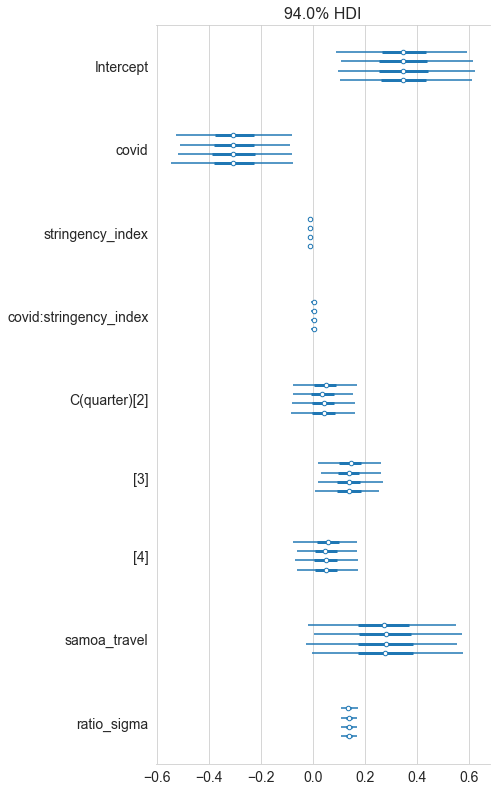

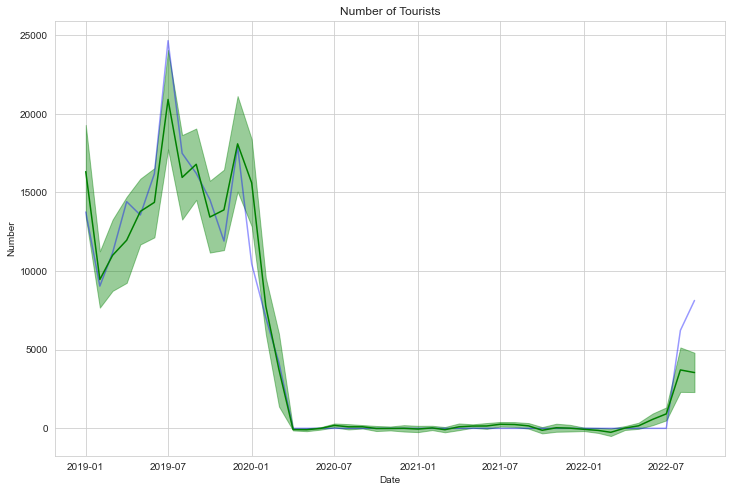

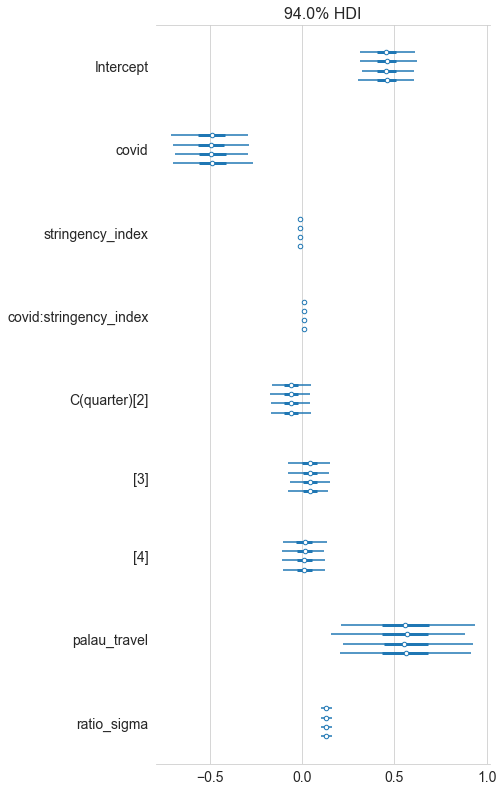

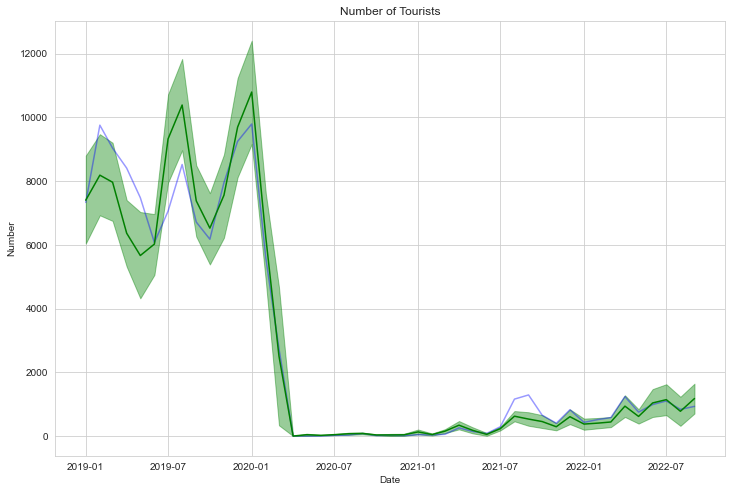

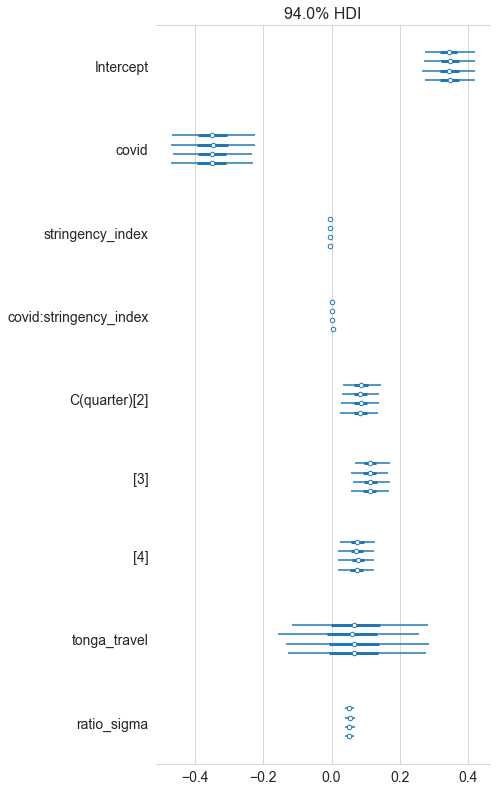

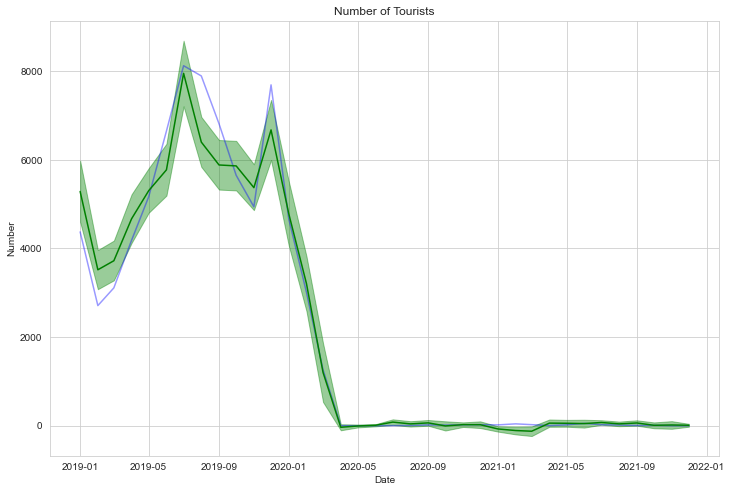

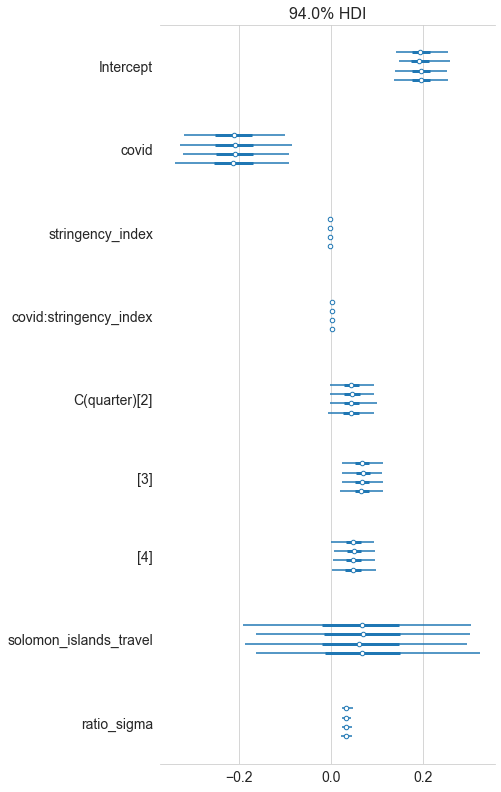

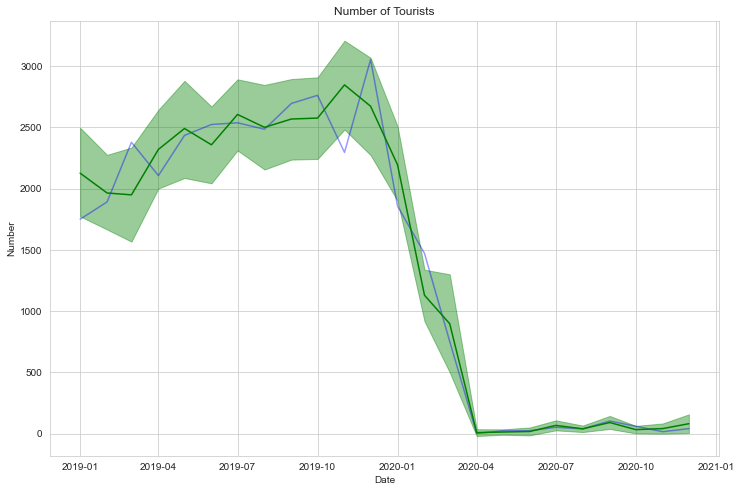

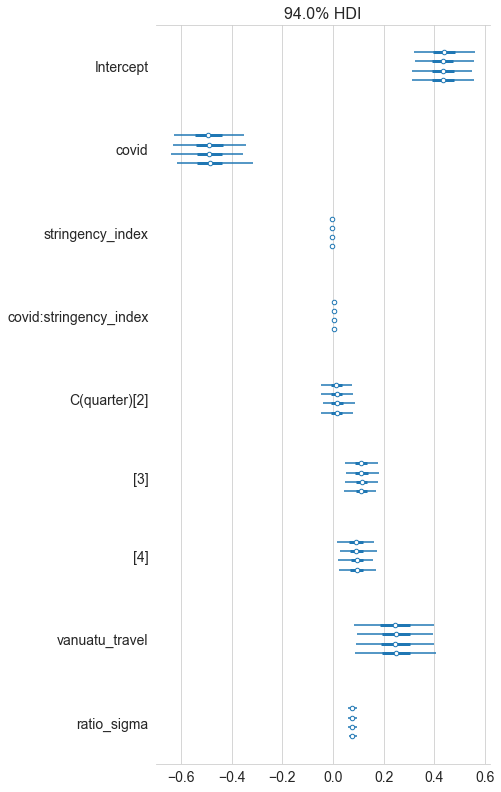

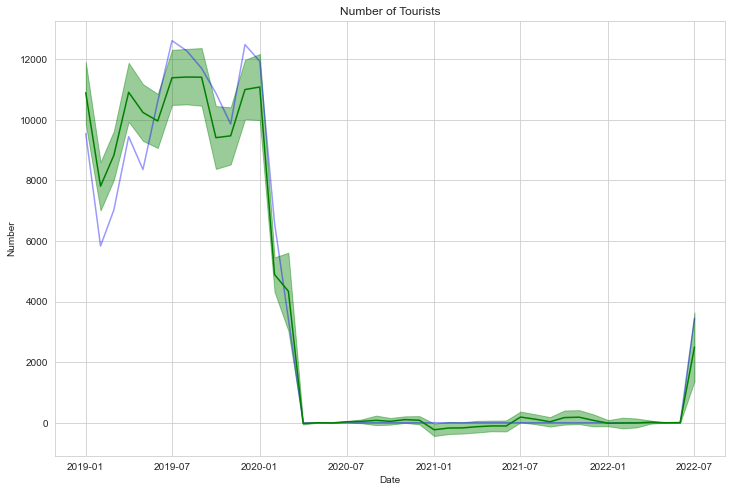

In [3]:
for country in ["samoa", "palau", "tonga", "solomon_islands", "vanuatu"]:

    mod = RatioPipe(country=country,)
    print(f"\n{country.upper()}'s Official and Avaition Data.")
    mod.read_and_merge()

    print(f"\n Create Loaded Factor for {country.upper()}:")
    mod.transform()

    optimal_lag = int(4 * (len(mod.data)/100) ** (2/9)) + 1
    print(f"\n Regression {country.upper()}:")
    mod.fit(formula="ratio~covid * stringency_index+C(quarter)+"+str(country)+"_travel",
            maxlags=optimal_lag)
    pred_df = mod.get_prediction_df()

    mean_pred, naive_pred = \
        mean_method(pred_df["total"]), naive_method(pred_df["total"])

    benchmark = pd.DataFrame()
    eval_name = ["mean", "naive", "ratio"]
    for idx, pred in zip(eval_name, [mean_pred, naive_pred, pred_df["pred_mean"]]):
        eval_df = pd.DataFrame(calculate_evaluation(
            pred_df["total"], pred), index=[idx])
        benchmark = pd.concat([benchmark, eval_df])
    display(benchmark)

    benchmark.to_csv(mod.country_data_folder + "/model/lf_eval_" + str(country) + ".csv",
                     encoding="utf-8")

    saved_pred_path = mod.country_data_folder + \
        "/model/lf_" + str(country) + ".csv"
    pred_df.to_csv(saved_pred_path, encoding="utf-8")


    blr = bmb.Model(
        "ratio ~ covid*stringency_index + C(quarter) +" + str(country) + "_travel", mod.data)
    trace = blr.fit(tune=2000, draws=2000, return_inferencedata=True)
    display(az.summary(trace, round_to=3))
    az.plot_forest(trace)
    
    # Bayesian Interval
    blr.predict(trace, kind="pps")
    posterior_stacked = az.extract(trace)
    predicted = posterior_stacked["ratio_mean"]

    # Compute the mean of the predictions, plotted as a single line.
    predicted_mean = predicted.mean("sample") * mod.data["seats_arrivals_intl"]

    # Compute 94% credible intervals for the predictions, plotted as bands
    hdi_data = np.quantile(predicted, [0.03, 0.97], axis=1)
    upper = hdi_data[0] * mod.data["seats_arrivals_intl"]
    lower = hdi_data[1] * mod.data["seats_arrivals_intl"]
    
    ax = plot_observed(mod.data)
    ax.plot(mod.data["date"], predicted_mean, color="green")
    ax.fill_between(mod.data["date"], upper, lower, alpha=0.4, color="green")